In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Social Network.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[   30 33000]
 [   23 30000]
 [   27 27000]
 [   50 23000]
 [   44 43000]
 [   45 51000]
 [   29 37000]
 [   41 25000]
 [   26 49000]
 [   42 50000]]


In [4]:
print(y)

[0 0 0 0 1 0 0 0 0 1]


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
print(x_train)

[[   42 50000]
 [   23 30000]
 [   29 37000]
 [   41 25000]
 [   50 23000]
 [   30 33000]
 [   45 51000]]


In [7]:
print(x_test)

[[   27 27000]
 [   26 49000]
 [   44 43000]]


In [8]:
print(y_train)

[1 0 0 0 0 0 0]


In [9]:
print(y_test)

[0 0 1]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
print(x_train)

[[ 0.53229065  1.38865236]
 [-1.54990512 -0.5362123 ]
 [-0.89236961  0.13749033]
 [ 0.4227014  -1.01742846]
 [ 1.40900465 -1.20991493]
 [-0.78278036 -0.2474826 ]
 [ 0.8610584   1.4848956 ]]


In [12]:
print(x_test)

[[-1.11154812 -0.824942  ]
 [-1.22113737  1.29240913]
 [ 0.75146915  0.71494973]]


In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [14]:
y_pred = classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 0]
 [1 0]]


<ipython-input-19-04324c90a328>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],


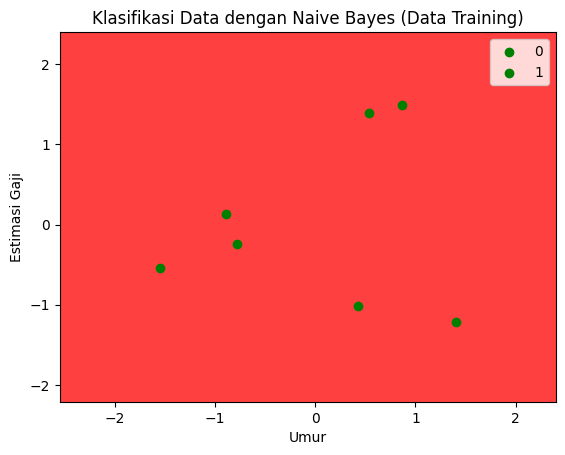

In [19]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(1), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

<ipython-input-20-7c8d9e2d3439>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],


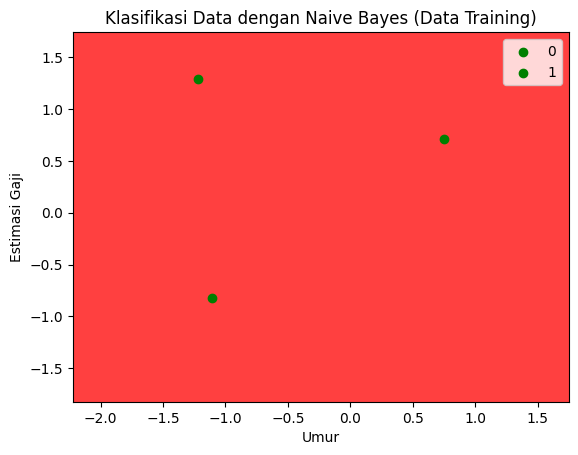

In [20]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(1), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()